# KMEAN

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

%matplotlib inline

#import numpy as np
#from numpy import unique
#from numpy import where

from kneed import KneeLocator

In [2]:
import warnings

# Set Seaborn theme
sns.set_theme(color_codes=True)

# Disable warnings
warnings.simplefilter("ignore")

# Load the data

In [3]:
try:
    data = pd.read_csv('../../datasets/AimoScoreWeakLinks.csv')
    data = data.drop(columns=['Unnamed: 0', 'AimoScore'])
except IOError as e:
    print(e)

## K = 2

In [4]:
#data_left_right['WeakLinks'] = data_left_right.WeakLinks.map({'LeftArmFallForward':0, 'RightArmFallForward':1, 'RightKneeMovesOutward':1, 'RightShoulderElevation':1, 'ForwardHead':2, 'ExcessiveForwardLean':3, 'LeftAsymmetricalWeightShift':0, 'LeftShoulderElevation':0, 'LeftKneeMovesOutward':0, 'RightKneeMovesInward':1, 'RightAsymmetricalWeightShift':1})

In [5]:
data_k_2 = data.drop(columns=["WeakLinks"])
y = data["WeakLinks"]

In [6]:
clustering_kmeans = KMeans(n_clusters=2)
data_k_2['clusters'] = clustering_kmeans.fit_predict(data_k_2)

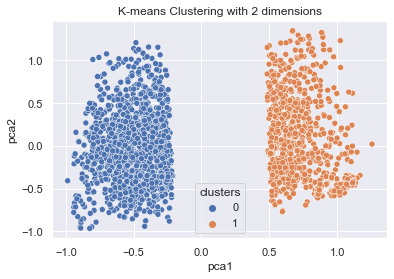

In [7]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
reduced_data = PCA(n_components=2).fit_transform(data_k_2)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data_k_2['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

## K = 3

In [8]:
data_k_3 = data.drop(columns=["WeakLinks"])
y = data["WeakLinks"]

In [9]:
clustering_kmeans = KMeans(n_clusters=3)
data_k_3['clusters'] = clustering_kmeans.fit_predict(data_k_3)

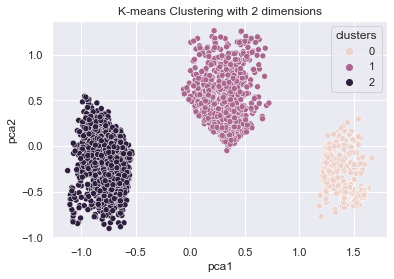

In [10]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
reduced_data = PCA(n_components=2).fit_transform(data_k_3)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data_k_3['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

## K = 11

In [11]:
data_k_11 = data.drop(columns=["WeakLinks"])
y = data["WeakLinks"]

In [12]:
clustering_kmeans = KMeans(n_clusters=11)
data_k_11['clusters'] = clustering_kmeans.fit_predict(data_k_11)

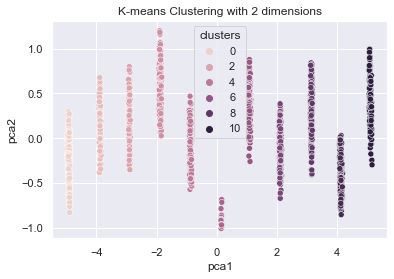

In [13]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
reduced_data = PCA(n_components=2).fit_transform(data_k_11)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data_k_11['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

## Find K

In [14]:
data_k_0 = data.drop(columns=["WeakLinks"])
y = data["WeakLinks"]

In [15]:
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_k_0)
    sse.append(kmeans.inertia_)

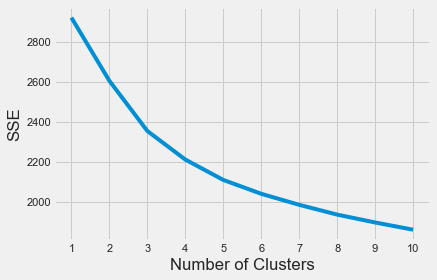

In [16]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [17]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

4

## K = 4

In [18]:
data_k_4 = data.drop(columns=["WeakLinks"])
y = data["WeakLinks"]

In [19]:
clustering_kmeans = KMeans(n_clusters=4)
data_k_4['clusters'] = clustering_kmeans.fit_predict(data_k_4)

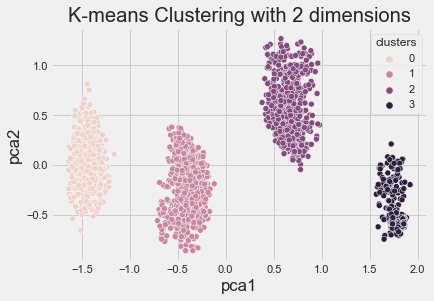

In [20]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
reduced_data = PCA(n_components=2).fit_transform(data_k_4)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data_k_4['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()